DBSCAN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from datetime import datetime

In [2]:
data = pd.read_csv('data/walmart_cleaned.csv')
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [3]:
data.describe()

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,211611.321278,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,122195.149363,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,105782.250000,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,211603.500000,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,317424.750000,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,423285.000000,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

In [5]:
data.isna().sum()

Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [6]:
data.columns

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

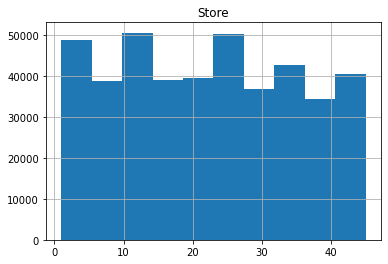

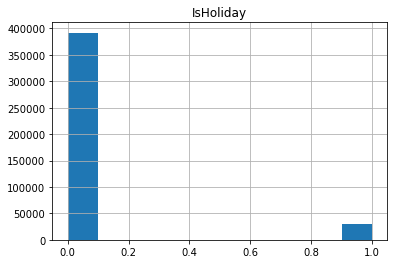

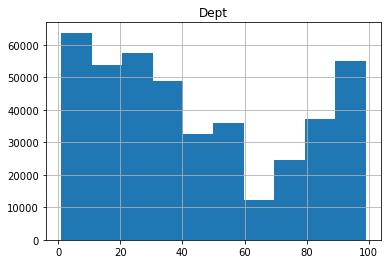

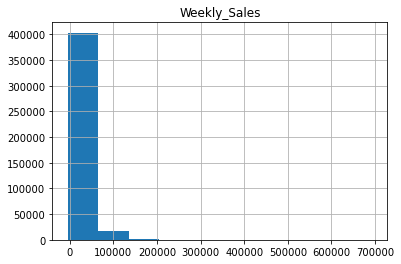

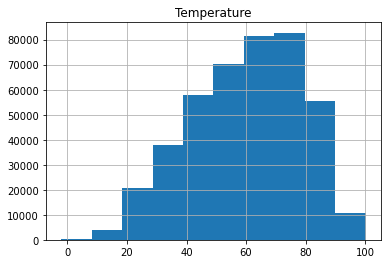

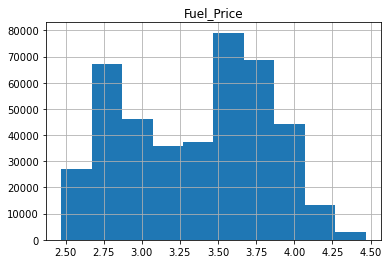

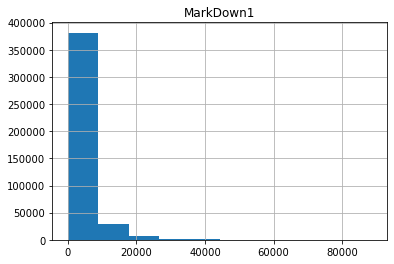

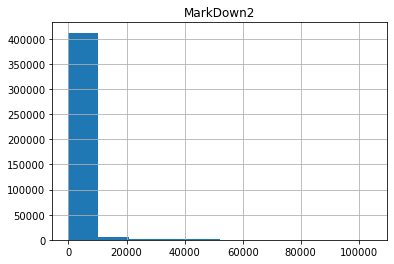

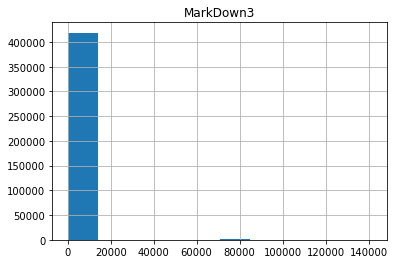

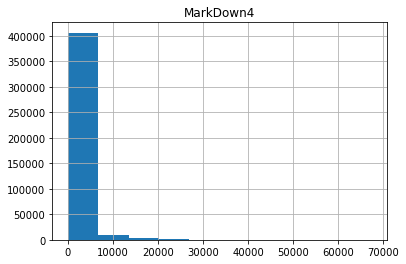

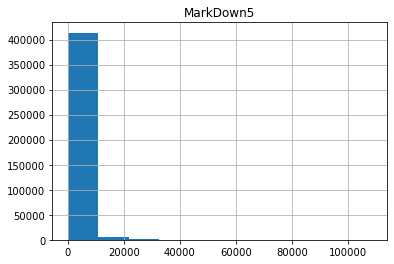

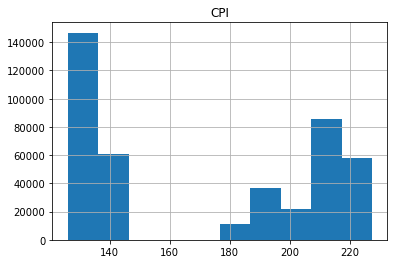

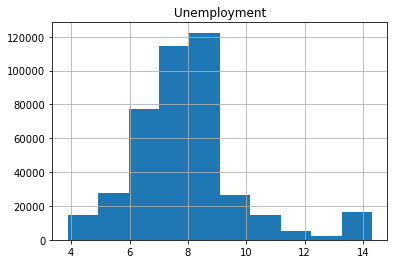

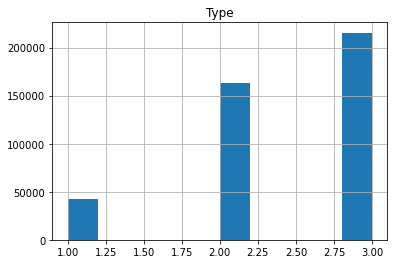

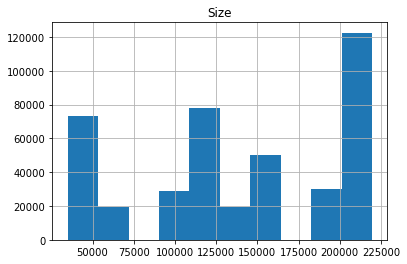

In [7]:
dfh = data.copy()
dfh.drop(columns=['Date', 'Unnamed: 0'] , axis=1 , inplace=True)

for col in dfh:
    dfh[[col]].hist()

<AxesSubplot:>

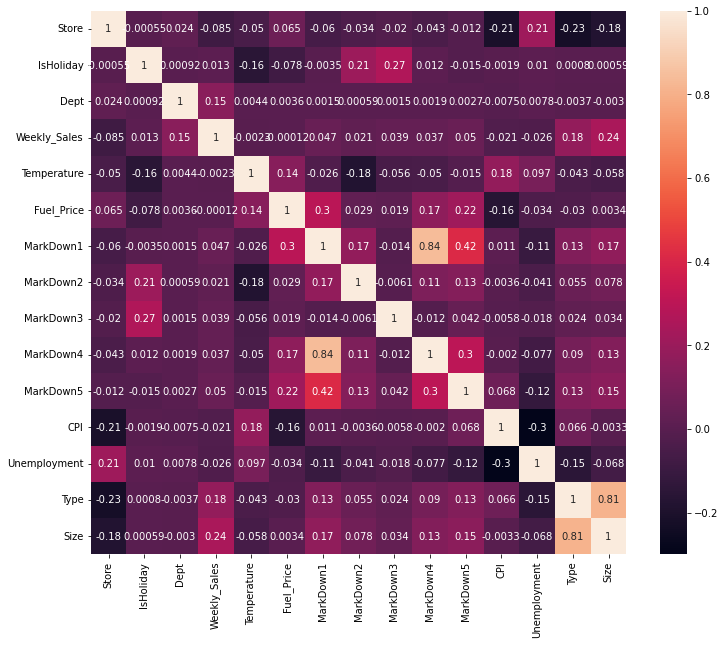

In [8]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(dfh.corr() , annot=True)

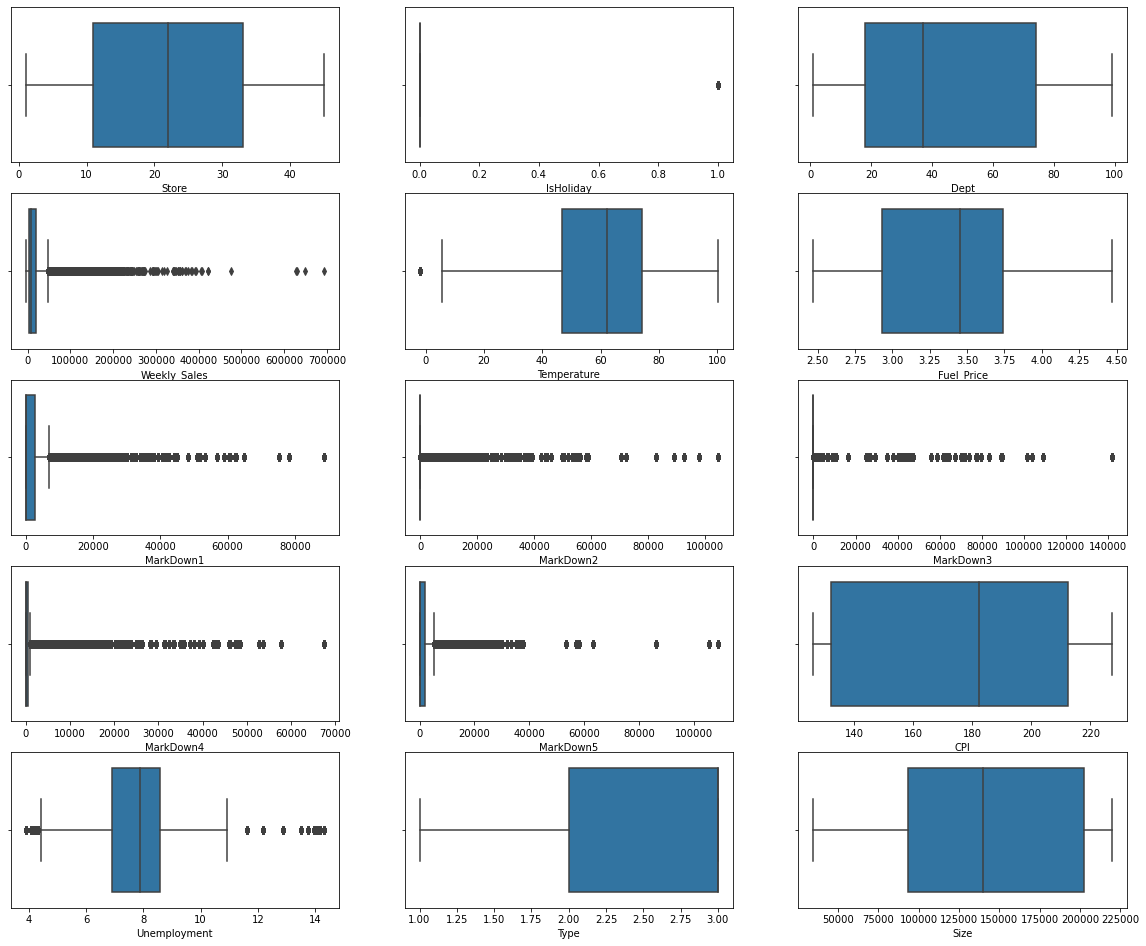

In [9]:
fig = plt.figure(figsize=(20,20))
for col in range(len(dfh.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=dfh.iloc[ : , col])
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
#min-max scaling vs Standard scaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(dfh)

In [11]:
df_scaled = pd.DataFrame(X_scaled) 
from sklearn import preprocessing
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.000000,0.042851,0.434149,0.050100,0.000000,0.002536,0.000205,0.000000,0.000000,0.840500,0.405118,1.0,0.630267
1,0.0,0.0,0.255102,0.023960,0.434149,0.050100,0.000000,0.002536,0.000205,0.000000,0.000000,0.840500,0.405118,1.0,0.630267
2,0.0,0.0,0.163265,0.026089,0.434149,0.050100,0.000000,0.002536,0.000205,0.000000,0.000000,0.840500,0.405118,1.0,0.630267
3,0.0,0.0,0.448980,0.007200,0.434149,0.050100,0.000000,0.002536,0.000205,0.000000,0.000000,0.840500,0.405118,1.0,0.630267
4,0.0,0.0,0.275510,0.008701,0.434149,0.050100,0.000000,0.002536,0.000205,0.000000,0.000000,0.840500,0.405118,1.0,0.630267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.0,0.0,0.122449,0.044735,0.595988,0.706413,0.045336,0.003091,0.000911,0.003141,0.007909,0.654796,0.458884,0.5,0.451136
421566,1.0,0.0,0.153061,0.010957,0.595988,0.706413,0.045336,0.003091,0.000911,0.003141,0.007909,0.654796,0.458884,0.5,0.451136
421567,1.0,0.0,0.316327,0.013065,0.595988,0.706413,0.045336,0.003091,0.000911,0.003141,0.007909,0.654796,0.458884,0.5,0.451136
421568,1.0,0.0,0.836735,0.008175,0.595988,0.706413,0.045336,0.003091,0.000911,0.003141,0.007909,0.654796,0.458884,0.5,0.451136


In [12]:
df_scaled.columns

RangeIndex(start=0, stop=15, step=1)

In [13]:
df_scaled.columns = ['Store', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']

In [14]:
df_scaled.describe()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,0.481831,0.070358,0.441432,0.030039,0.608122,0.445404,0.029218,0.010934,0.003510,0.016052,0.015322,0.446165,0.391153,0.705044,0.551310
std,0.290575,0.255750,0.311143,0.032533,0.180508,0.229717,0.068275,0.048523,0.039029,0.057718,0.038773,0.387069,0.178579,0.333168,0.330076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.227273,0.000000,0.173469,0.010126,0.476908,0.230962,0.000000,0.002536,0.000205,0.000000,0.000000,0.058898,0.288672,0.500000,0.318073
50%,0.477273,0.000000,0.367347,0.018051,0.627691,0.490982,0.000000,0.002536,0.000205,0.000000,0.000000,0.556049,0.382116,1.000000,0.569925
75%,0.727273,0.000000,0.744898,0.036091,0.746967,0.634269,0.031688,0.002557,0.000237,0.006303,0.019978,0.853554,0.449780,1.000000,0.907349
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


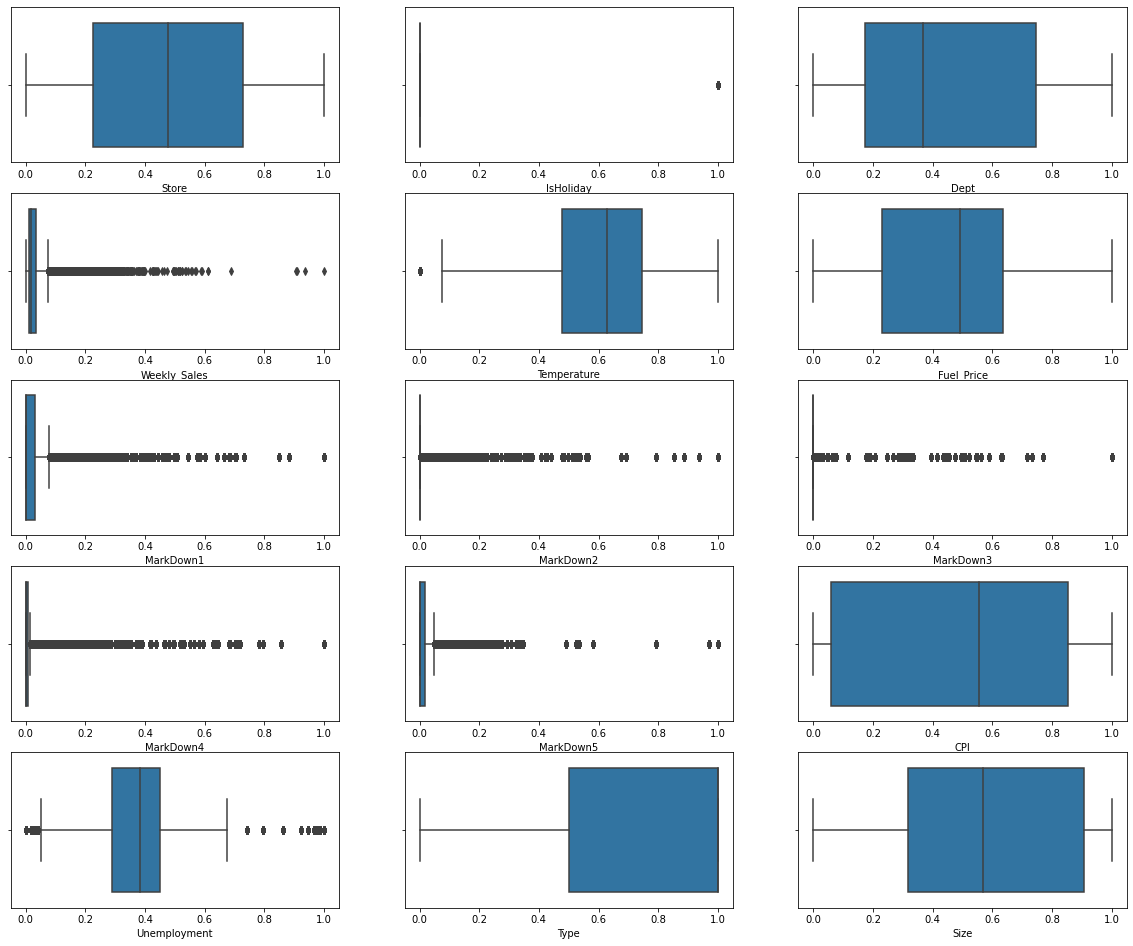

In [15]:
fig = plt.figure(figsize=(20,20))
for col in range(len(df_scaled.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df_scaled.iloc[ : , col])
plt.show()

PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

In [17]:
df_pca.shape

(421570, 2)

K-Means = Elbow Method to find the optimal number of clusters using SSE and WCSS

In [18]:
from sklearn.cluster import KMeans

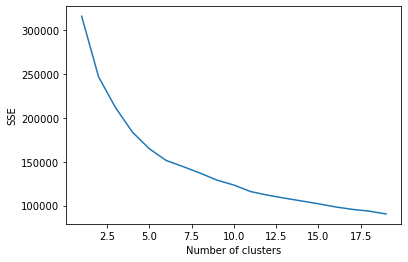

In [19]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

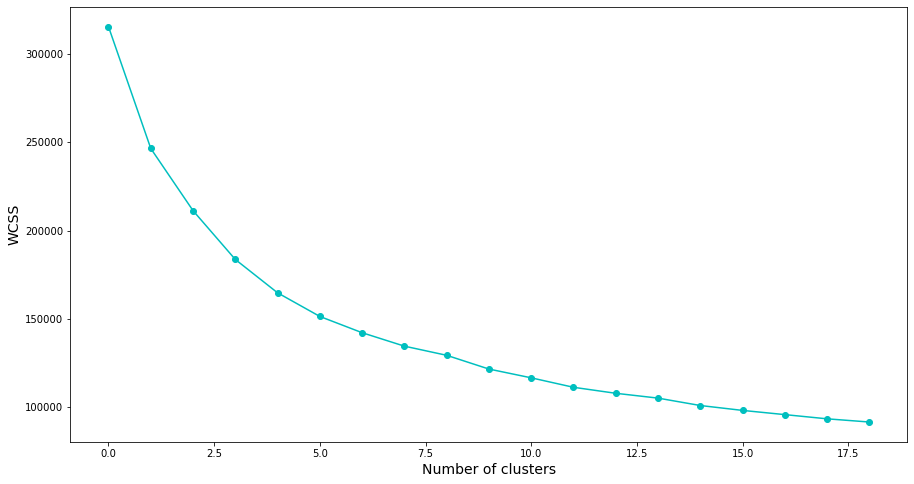

In [20]:
#WCSS = Within-Cluster Sum of Square
#sum of squared distance between each point and the centroid in a cluster
wcss= []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,8)) 
plt.plot(wcss, 'bo-', color='c')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14);

K-Means with clusters = 7

In [21]:
kmeans =  KMeans(n_clusters=7, max_iter=1000, algorithm = 'auto')
kmeans.fit(df_pca)

KMeans(max_iter=1000, n_clusters=7)

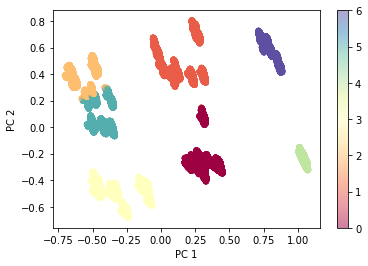

In [22]:
plt.scatter(df_pca[:, 0], df_pca[:, 1],
            c= kmeans.labels_.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral'))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()

In [23]:
df_scaled["cluster"] = kmeans.labels_.astype(float)
df_scaled

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,cluster
0,0.0,0.0,0.000000,0.042851,0.434149,0.050100,0.000000,0.002536,0.000205,0.000000,0.000000,0.840500,0.405118,1.0,0.630267,2.0
1,0.0,0.0,0.255102,0.023960,0.434149,0.050100,0.000000,0.002536,0.000205,0.000000,0.000000,0.840500,0.405118,1.0,0.630267,2.0
2,0.0,0.0,0.163265,0.026089,0.434149,0.050100,0.000000,0.002536,0.000205,0.000000,0.000000,0.840500,0.405118,1.0,0.630267,2.0
3,0.0,0.0,0.448980,0.007200,0.434149,0.050100,0.000000,0.002536,0.000205,0.000000,0.000000,0.840500,0.405118,1.0,0.630267,2.0
4,0.0,0.0,0.275510,0.008701,0.434149,0.050100,0.000000,0.002536,0.000205,0.000000,0.000000,0.840500,0.405118,1.0,0.630267,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.0,0.0,0.122449,0.044735,0.595988,0.706413,0.045336,0.003091,0.000911,0.003141,0.007909,0.654796,0.458884,0.5,0.451136,0.0
421566,1.0,0.0,0.153061,0.010957,0.595988,0.706413,0.045336,0.003091,0.000911,0.003141,0.007909,0.654796,0.458884,0.5,0.451136,0.0
421567,1.0,0.0,0.316327,0.013065,0.595988,0.706413,0.045336,0.003091,0.000911,0.003141,0.007909,0.654796,0.458884,0.5,0.451136,0.0
421568,1.0,0.0,0.836735,0.008175,0.595988,0.706413,0.045336,0.003091,0.000911,0.003141,0.007909,0.654796,0.458884,0.5,0.451136,0.0


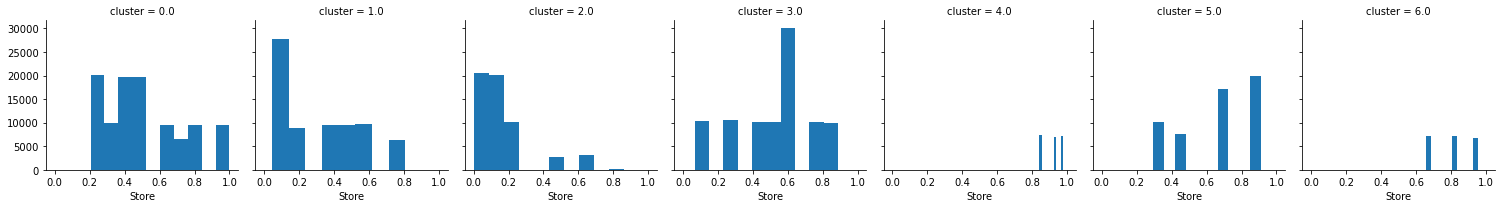

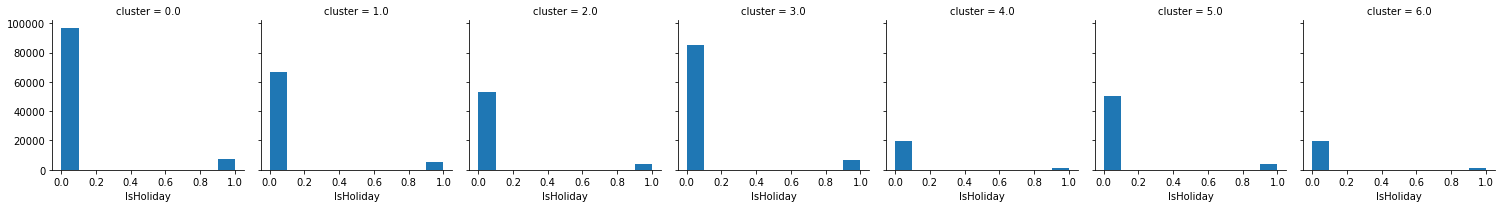

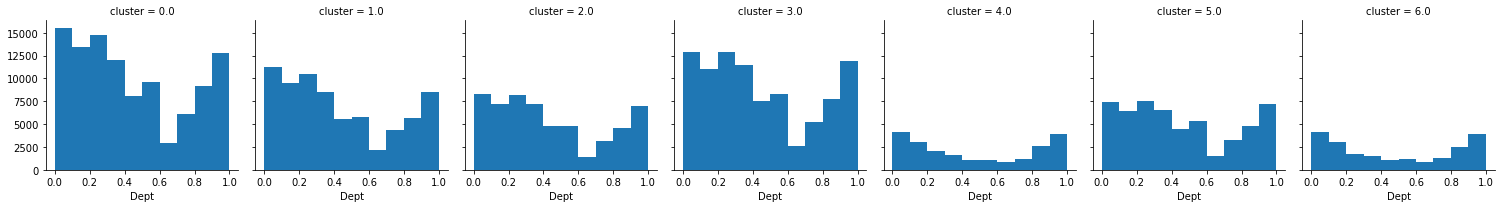

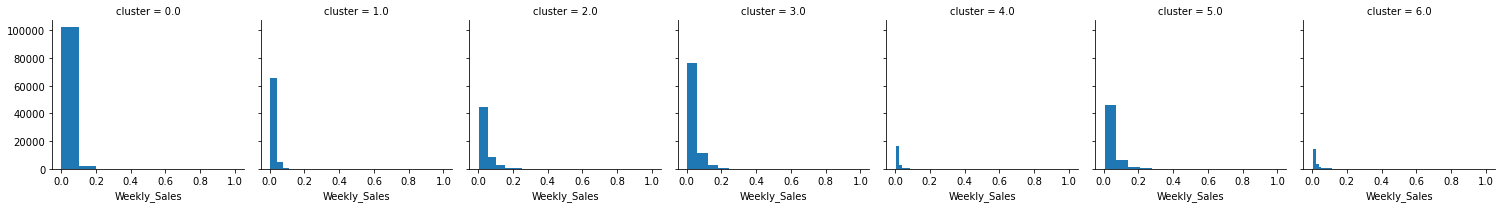

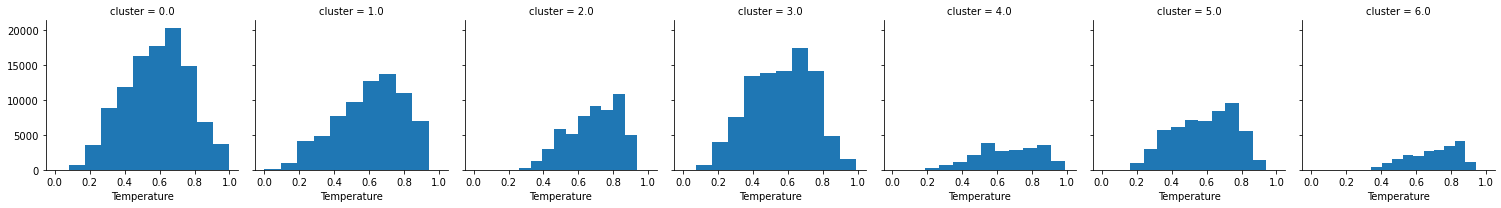

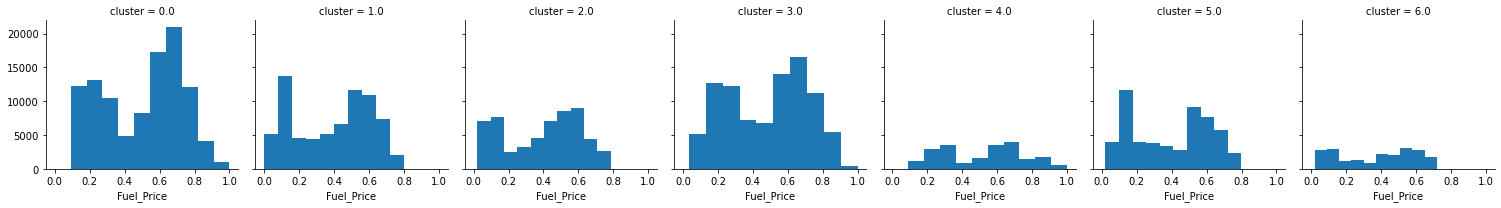

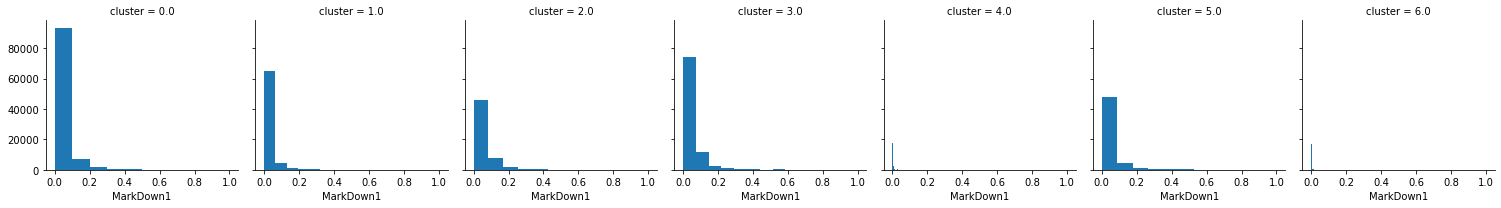

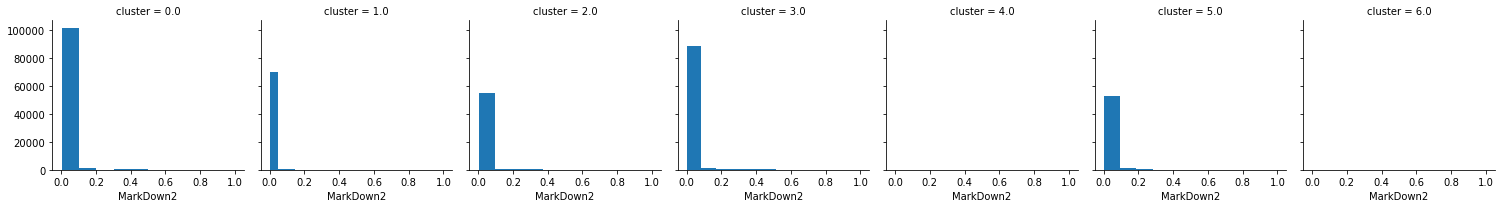

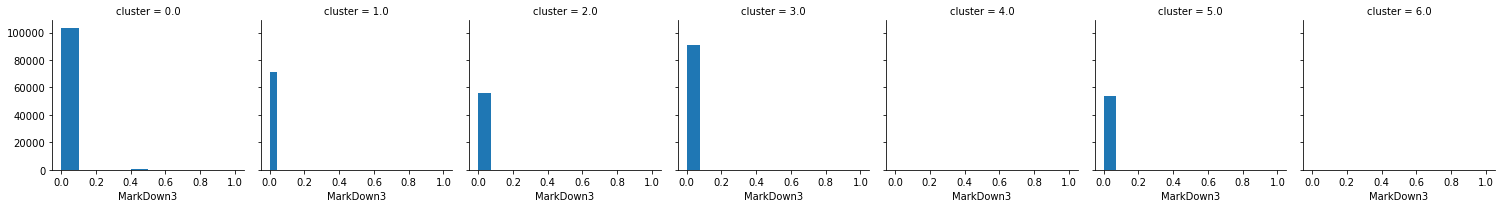

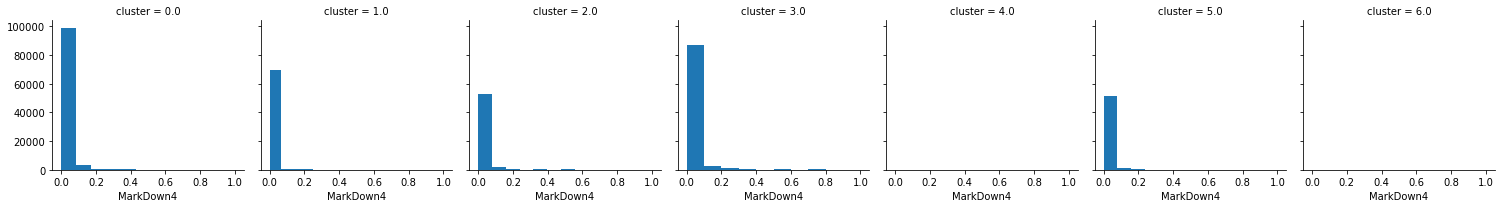

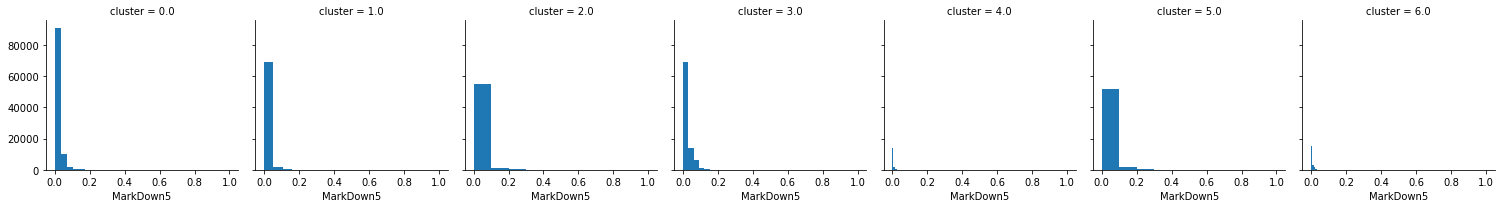

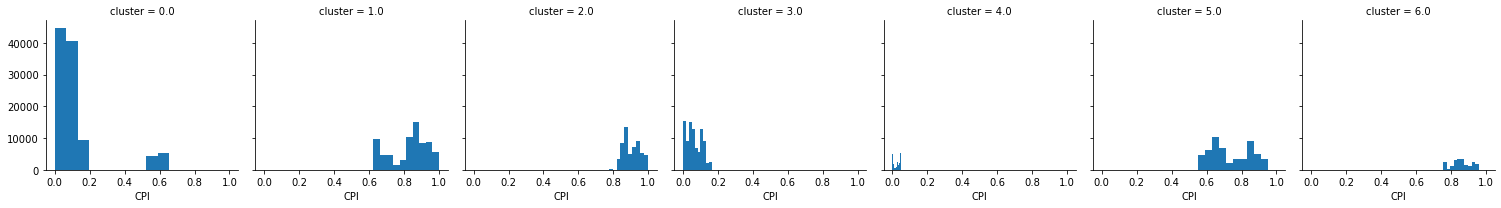

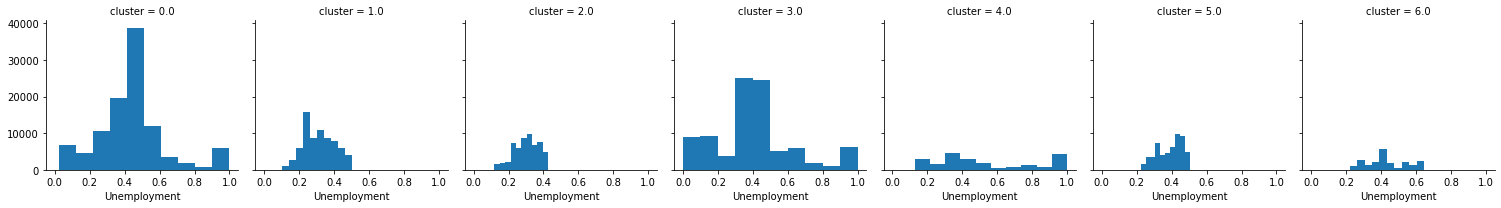

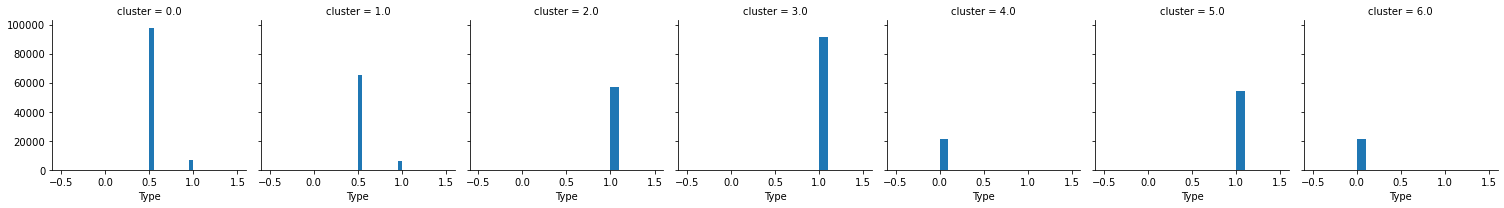

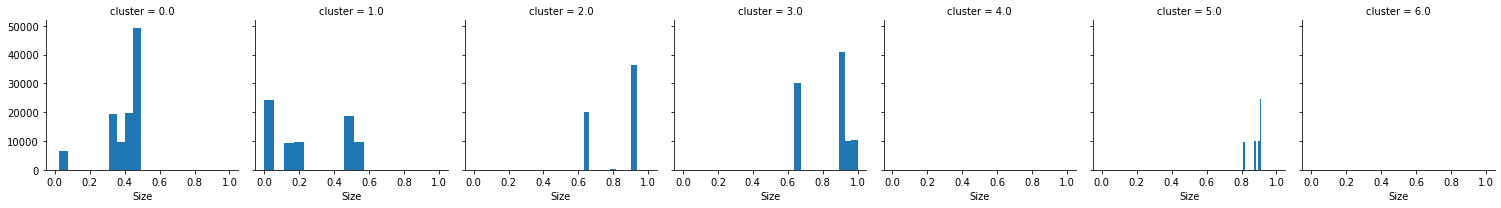

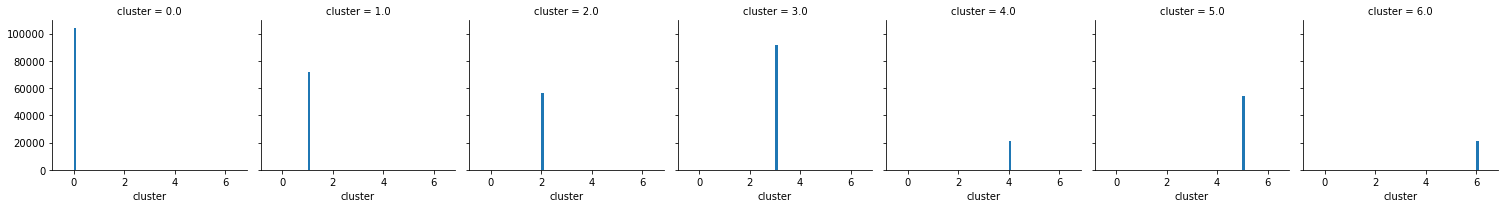

In [24]:
for c in df_scaled:
    grid= sns.FacetGrid(df_scaled, col='cluster')
    grid.map(plt.hist, c)  

DBSCAN

In [25]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_dbscan = pca.transform(df_scaled)

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1000, min_samples=10).fit(df_dbscan)
labels = db.labels_
plt.scatter(df_dbscan[:, 0], df_dbscan[:, 1],
            c= labels.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar();

In [ ]:
df_scaled["clusterDBSCAN"] = labels.astype(float)
df_scaled

In [ ]:
for c in df_scaled:
    grid= sns.FacetGrid(df_scaled, col='clusterDBSCAN')
    grid.map(plt.hist, c)    

In [ ]:
dff = df_scaled.groupby("cluster")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
dff.describe(include="all")

In [ ]:
dfh["cluster"] = kmeans.labels_.astype(float)

dfhh = dfh.groupby("cluster")

dfh.describe()

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_builder =DecisionTreeClassifier(max_depth = 3)
model = tree_builder.fit(dfh[['Store', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']], dfh["cluster"])

In [ ]:
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model, feature_names=['Store', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
class_names = ['NORMAL', 'NORMAL', 'PREMIUM'],
)

In [ ]:
for c in dfh:
    grid= sns.FacetGrid(dfh, col='cluster')
    grid.map(plt.hist, c) 

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Week'] = pd.to_datetime(data['Date']).dt.week
data['DayOfTheWeek'] = data['Date'].dt.dayofweek
data['Day'] = pd.to_datetime(data['Date']).dt.day

In [ ]:
df = data[['Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']]

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.info()

In [ ]:
df_pca = pd.DataFrame(data=df, columns=['IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'])

In [ ]:
df_pca.head()

In [ ]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [ ]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df_pca)) #scaling the data
scaled_data

In [ ]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(scaled_data.corr(), annot=True)

In [ ]:
#Applying PCA
#Taking no. of Principal Components as 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.shape()

TypeError: ignored

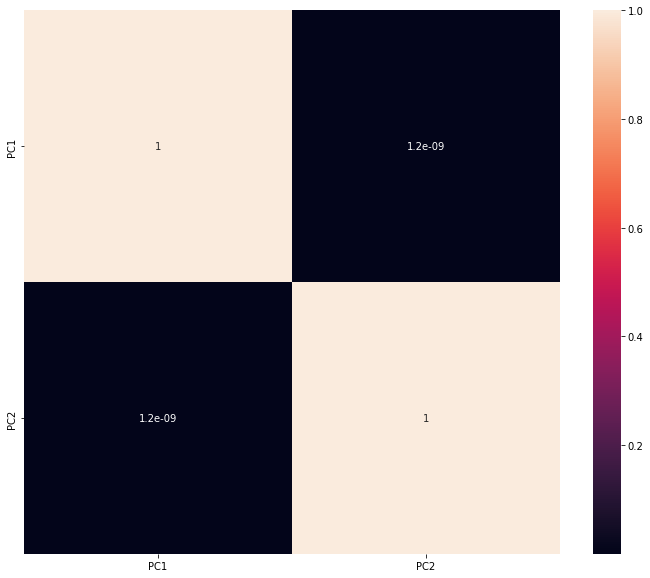

In [ ]:

#Checking Co-relation between features after PCA
fig = plt.figure(figsize=(12,10))
sns.heatmap(data_pca.corr(), annot=True)


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
X = data[['Weekly_Sales','Date']]

In [ ]:
dbscan = DBSCAN(eps = 1000, min_samples= 4)

In [ ]:
db_model = dbscan.fit(X)

TypeError: ignored

In [ ]:
labels = db_model.labels_
len(labels)

421570

In [ ]:
df[labels == -1]

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,
2010-02-12,1,92.0,143081.42,38.51,2.548,0.00,0.00,0.0,0.00,0.00,211.242170,8.106,3,151315
2010-02-26,0,95.0,103652.58,46.63,2.561,0.00,0.00,0.0,0.00,0.00,211.319643,8.106,3,151315
2010-11-19,0,92.0,157621.22,51.41,2.771,0.00,0.00,0.0,0.00,0.00,211.889674,7.838,3,151315
2010-11-26,1,72.0,196810.42,64.52,2.735,0.00,0.00,0.0,0.00,0.00,211.748433,7.838,3,151315
2010-11-26,1,92.0,170904.79,64.52,2.735,0.00,0.00,0.0,0.00,0.00,211.748433,7.838,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0,23.0,19992.29,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,0,1.0,27117.16,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,0,38.0,47799.07,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [ ]:
# percantage. of Outliers
sum(labels == -1)/df.shape[0]*100

9.127547026591076

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data=df, x="Weekly_Sales", y="t-SNE-2", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

Date
2010-02-05    24924.50
2010-02-05    11737.12
2010-02-05    13223.76
2010-02-05       37.44
2010-02-05     1085.29
                ...   
2012-10-26    26240.14
2012-10-26     2660.02
2012-10-26     4131.54
2012-10-26      717.82
2012-10-26     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

1000


ValueError: ignored

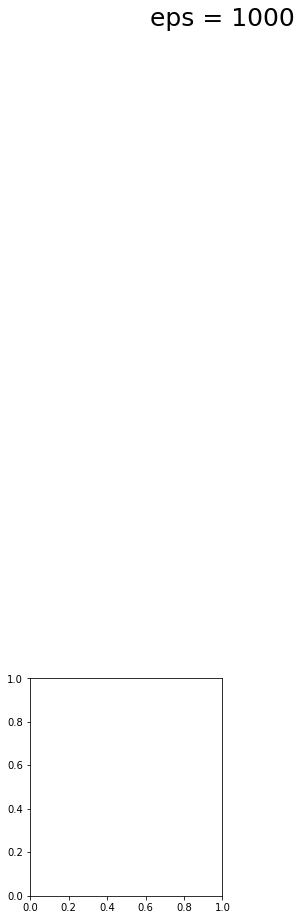

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1

eps = 1000
db = DBSCAN(eps=eps, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print(eps)

ax = fig.add_subplot(2, 5, 1)
ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=25, ha="center")
sns.scatterplot(X[:0], X[:1], hue=["cluster-{}".format(x) for x in labels])
